# Parte 4: Teste de hipótese
Conduzir testes inferenciais adequados que possam dar base à tomada de decisão

Embora seja um clichê pensarmos que alguns grupos de países são mais avançados que outros, isso nem sempre se confirma quando observamos dados. Nesta parte do trabalho, verificaremos se temos dados suficientes para justificar afirmações como esta. Tome por base o modelo estatístico que você encontrou na etapa anterior para as classificações “avançado” ou “atrasado” de países e:

- Para cada bloco, encontre a probabilidade de um país sorteado aleatoriamente naquele bloco ser da categoria “avançado” (isto é: P(avançado|bloco)).
- Usando bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) para cada bloco.
- Mostre, em uma figura, P(avançado|bloco) e os intervalos de confiança calculados. Há sobreposição dos intervalos de confiança? Quais?
- Levando em consideração os intervalos de confiança, seria seguro dizer que países de um bloco são tipicamente mais “avançados” que os de outro bloco em relação ao indicador que você escolheu?


### Texto

Nesta etapa final, recebemos a proposta de efetuar testes inferenciais com o propósito de auxiliar na tomada de decisão durante a classificação de grupos de países feita num trabalho anterior. A classificação seguiu o seguinte critério: Porcentagem de crianças fora da escola menor que 5% categorizava-se um país como avançado, e consequentemente, atrasado para os demais.

Para colher dados sobre a real acurácia da pesquisa, utilizamos a técnica de Bootstrapping, que consiste em efetuar diversas amostragens com reposição para estimar a variabilidade em uma estatística de interesse. “Bootstrapping é um procedimento estatístico que reamostra um conjunto de dados para criar muitas amostras simuladas. Este processo permite o cálculo de erros padrão, intervalos de confiança e testes de hipóteses”. (Frost)

O resultado encontrado com o Bootstrapping, incluindo a técnica de descarte de outliers, mostrou que com 90% de confiança, os países da OTAN eram majoritariamente classificados como avançados, conforme os dados se concentram sobre o percentil 95. Em seguida, mantendo o nível de confiança, mas em contraste, o método permitiu observar que a classificação média dos BRICS contava com uma porcentagem abaixo dos 50% para avançados, com os dados distantes do percentil citado. 

Dessa forma, a criação dessa distribuição empírica, permitiu encontrar por exemplo, um desvio padrão que fosse próximo ao erro padrão, para novamente verificar a confiabilidade da média amostral calculada. Assim, as reamostragens e o intervalo de confiança permitiram concluir que países da OTAN são tipicamente mais avançados em relação aos membros dos BRICS.

Referências: <br>
Forst, Jim. “Introduction to Bootstrapping in Statistics with an Example”. Statistics by Jim. https://statisticsbyjim.com/hypothesis-testing/bootstrapping/. Acesso em 18 de Novembro de 2022.


Correções APS3:

| Tiago Disse:  | Eu Fiz:  |
|---|---|
|Substituir o termo assertividade por acurácia|Termo corrigido no texto e exercícios|

##### Reutilizando dados da APS3

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [14]:
import pandas as pd

#OTAN
df = pd.read_csv('dados_corrigidos/API_SE.PRM.UNER.ZS_DS2_en_csv_v2_4492680.csv', sep=',', encoding='latin1', skiprows=4, decimal='.')
filtro_otan = ['United States','Canada','Belgium','France','Italy','Denmark','Iceland','Norway','Portugal','Luxembourg','United Kingdom','Greece','Turkiye','Germany','Poland','Czech Republic','Hungary']
df_otan = df[df['Country Name'].isin(filtro_otan)]
df_otan['Avançado'] = df['2019'] < 5

#BRICS
filtros_brics = ['Brazil','India', 'South Africa', 'Russian Federation', 'China']
df_brics = df[df['Country Name'].isin(filtros_brics)]
df_brics['Avançado'] = df['2019'] < 5

C:\Users\Scott\AppData\Local\Temp\ipykernel_7296\434612064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otan['Avançado'] = df['2019'] < 5
C:\Users\Scott\AppData\Local\Temp\ipykernel_7296\434612064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brics['Avançado'] = df['2019'] < 5


#### EX1


In [15]:
print('P(avançado | BRICS)')
print(f"OTAN: {100 * len(df_otan[df_otan['Avançado'] == True]) / len(df_otan):.1f}%")

P(avançado | BRICS)
OTAN: 94.1%


In [16]:
print('P(avançado | OTAN)')
print(f"BRICS: {100 * len(df_brics[df_brics['Avançado'] == True]) / len(df_brics)}%")

P(avançado | OTAN)
BRICS: 40.0%


#### TRATAMENTO DE DADOS

In [17]:
df_otan = df_otan.replace(True, 'Avançado')
df_otan = df_otan.replace(False, 'Atrasado')
df_brics = df_brics.replace(True, 'Avançado')
df_brics = df_brics.replace(True, 'Atrasado')

#### BOOTSTRAP (FUNÇÃO)

In [18]:
def reamostrar_varias_vezes_median(amostras, m, n=9999):
    std = []
    for i in range(n):
        amostras_ = np.random.choice(amostras, size=m, replace=True)
        avancado = 0
        for i in amostras_:
            if i == 'Avançado':
                avancado += 1
        std.append(avancado/m)
    return np.median(std), np.percentile(std, 5), np.percentile(std, 95), std

#### OBTENDO RESULTADOS E MONTANDO FIGURA DO BOOTSTRAP

Média Otan: 1.0 |  Percentil 5 Otan: 0.8 |  Percentil 95 Otan: 1.0
Média Brics: 0.4 |  Percentil 5 Brics: 0.2 |  Percentil 95 Brics: 0.7


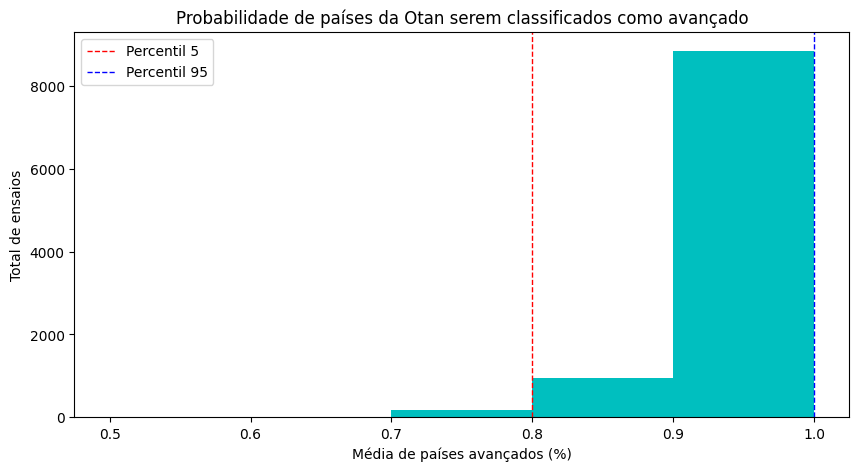

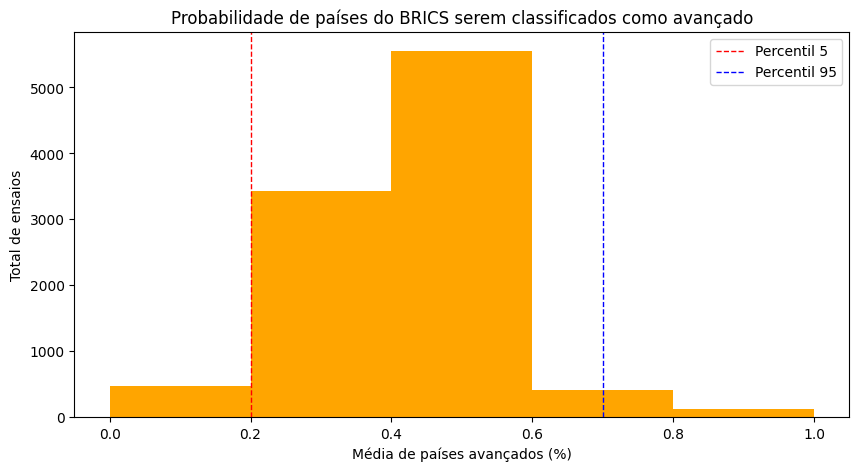

In [29]:
media_ot, percentil_5_ot, percentil_95_ot, amostra_ot = reamostrar_varias_vezes_median(df_otan['Avançado'], 10)
media_br, percentil_5_br, percentil_95_br, amostra_br = reamostrar_varias_vezes_median(df_brics['Avançado'], 10)
print('Média Otan: ' + str(media_ot) + ' |  Percentil 5 Otan: ' + str(percentil_5_ot) + ' |  Percentil 95 Otan: ' + str(percentil_95_ot))
print('Média Brics: ' + str(media_br) + ' |  Percentil 5 Brics: ' + str(percentil_5_br) + ' |  Percentil 95 Brics: ' + str(percentil_95_br))

fig, ax = plt.subplots(figsize=(10,5))
N, bins, patches = plt.hist(amostra_ot, bins=5, color=['c'])
plt.axvline(percentil_5_ot, color='red', linestyle='dashed', linewidth=1, label='Percentil 5')
plt.axvline(percentil_95_ot, color='blue', linestyle='dashed', linewidth=1, label='Percentil 95')
plt.title('Probabilidade de países da Otan serem classificados como avançado')
plt.xlabel('Média de países avançados (%)')
plt.ylabel('Total de ensaios')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
N, bins, patches = plt.hist(amostra_br, bins=5, color=['orange'])
plt.title('Probabilidade de países do BRICS serem classificados como avançado')
plt.xlabel('Média de países avançados (%)')
plt.axvline(percentil_5_br, color='red', linestyle='dashed', linewidth=1, label='Percentil 5')
plt.axvline(percentil_95_br, color='blue', linestyle='dashed', linewidth=1, label='Percentil 95')
plt.ylabel('Total de ensaios')
plt.legend()
plt.show()
